In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
a = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
a.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
b = a.dropna()
b.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [40]:
target = b['Potability']
print(target)

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64


In [41]:
features = b.drop(columns = 'Potability')
print(features)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.5

In [42]:
import numpy as np
c = b['Hardness']
data = np.array(c)
normalizedData = (data-np.min(data))/(np.max(data)-np.min(data))
normalizedData = normalizedData*(1-0)
print(normalizedData)

[0.57774671 0.44130035 0.47087564 ... 0.08743355 0.4640915  0.49289123]


In [43]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(b)
nd = scaler.transform(b)
#print(nd)
b.loc[:, :] = nd
b.head()

<ipython-input-43-59151978f9b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.loc[:, :] = nd
<ipython-input-43-59151978f9b6>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  b.loc[:, :] = nd


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0.0
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0.0
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0.0
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0.0
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0.0


In [44]:
print(b.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [45]:
print(b.shape)

(2011, 10)


In [46]:
b.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.497984,0.502267,0.384500,0.489383,0.580133,0.407644,0.490098,0.500973,0.499476,0.403282
std,0.114238,0.133835,0.153865,0.135038,0.117050,0.146292,0.134035,0.139289,0.154685,0.490678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425647,0.423434,0.272304,0.404565,0.507435,0.299173,0.400057,0.410452,0.395048,0.000000
50%,0.493723,0.507286,0.366982,0.490199,0.577314,0.402079,0.488659,0.502198,0.499168,0.000000
75%,0.568195,0.586226,0.478240,0.572493,0.654291,0.508867,0.583836,0.595331,0.607399,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
print(b.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [48]:
print(b.isnull())

         ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
5     False     False   False        False    False         False   
6     False     False   False        False    False         False   
7     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3267  False     False   False        False    False         False   
3268  False     False   False        False    False         False   
3269  False     False   False        False    False         False   
3270  False     False   False        False    False         False   
3271  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
3              False            False      False       False  
4              False            False      Fa

In [49]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   float64
dtypes: float64(10)
memory usage: 172.8 KB


In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.show()

<Figure size 1000x800 with 0 Axes>

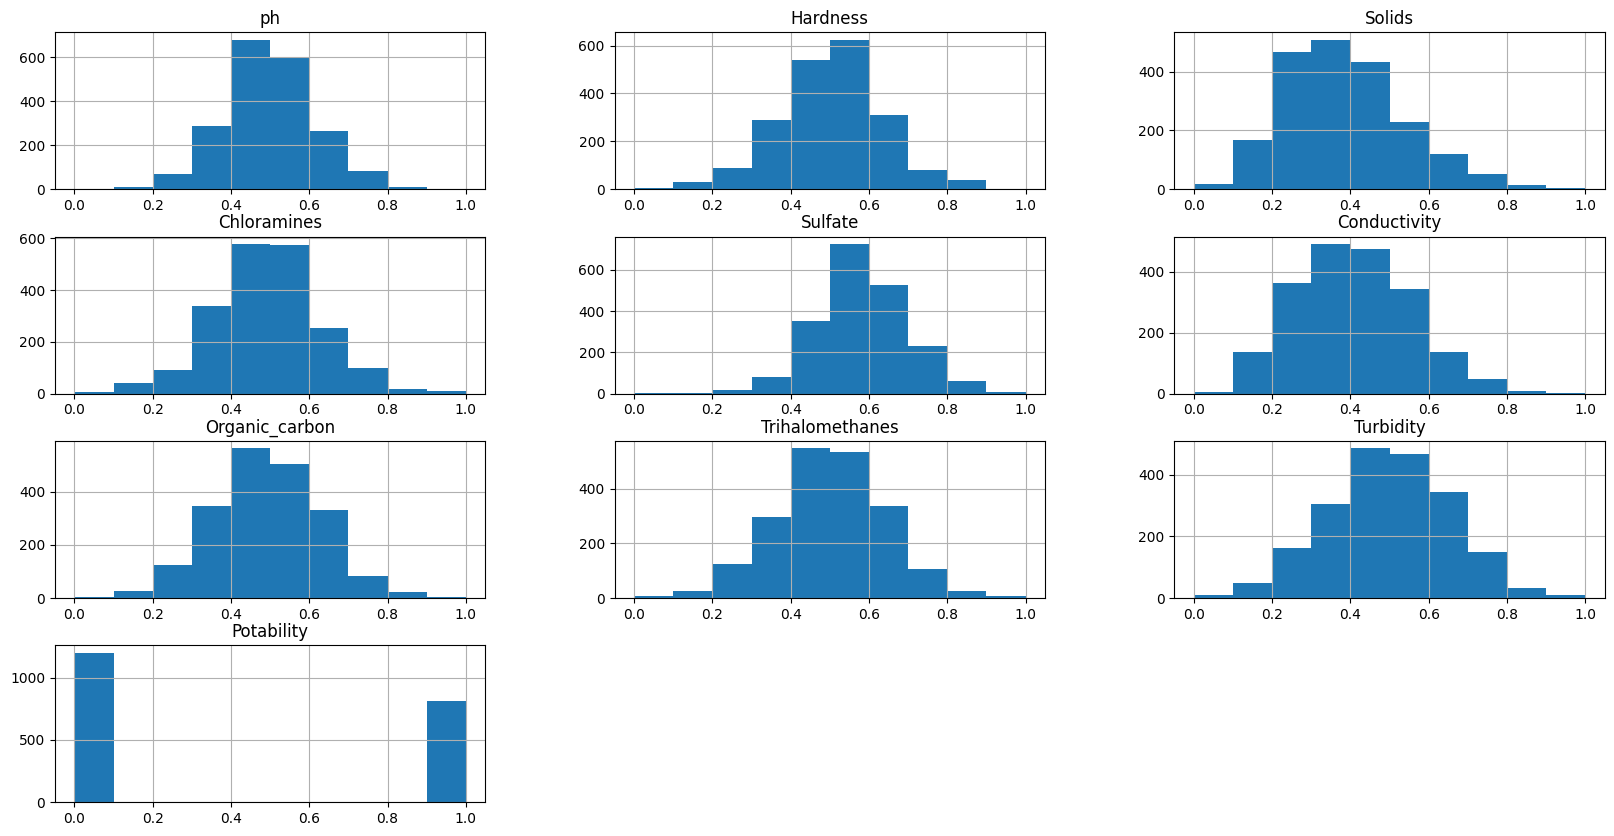

In [51]:
plt.rcParams['figure.figsize'] = [20,10]
b.hist()
plt.show()

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

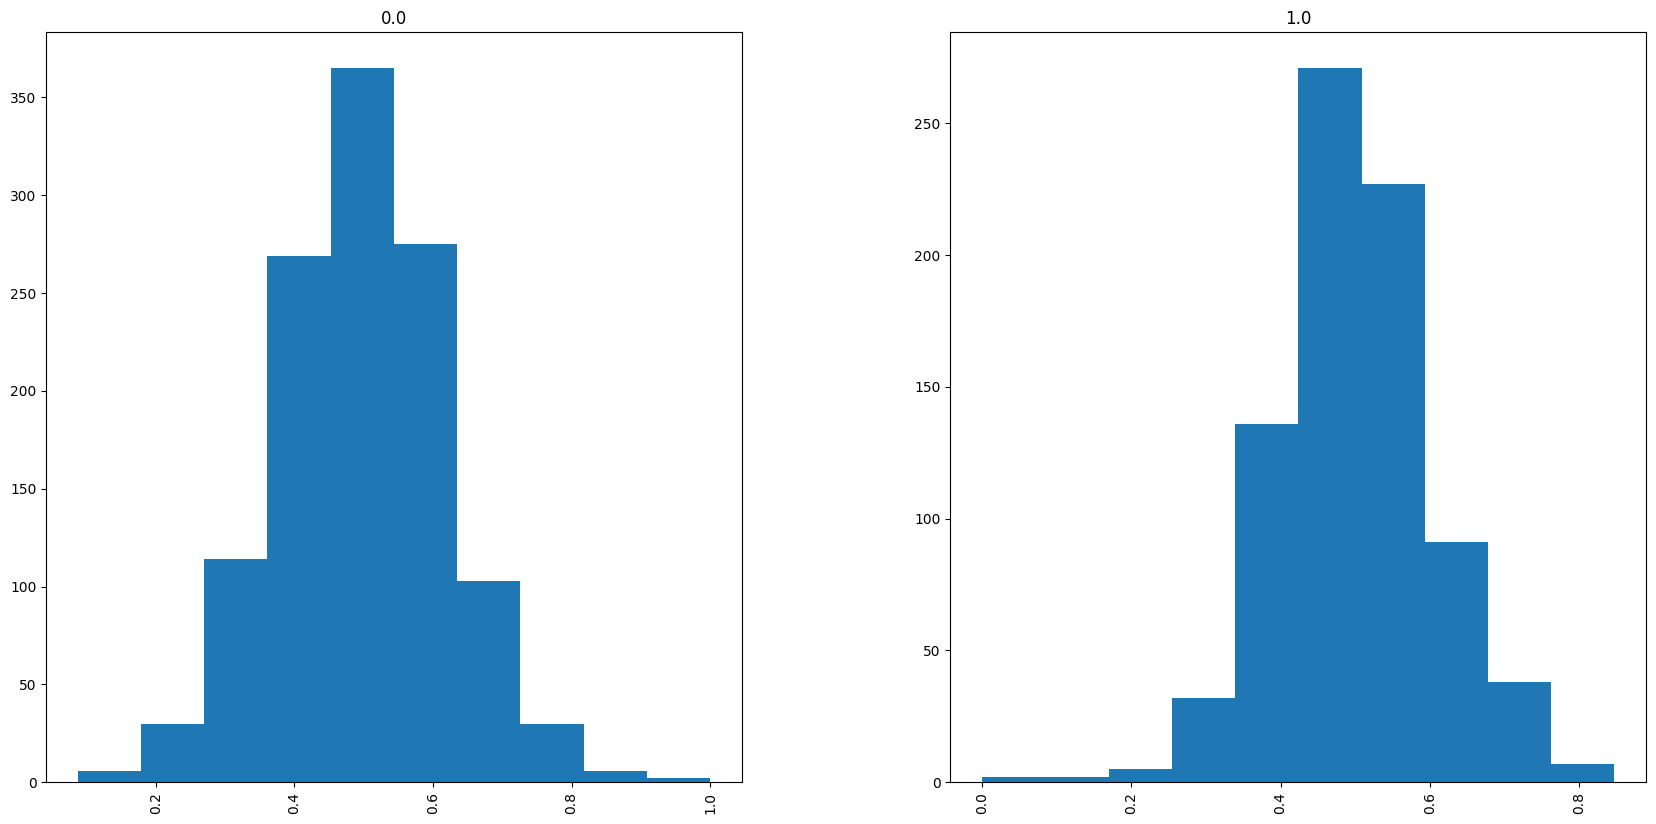

In [52]:
b.hist(column='ph', by='Potability')

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

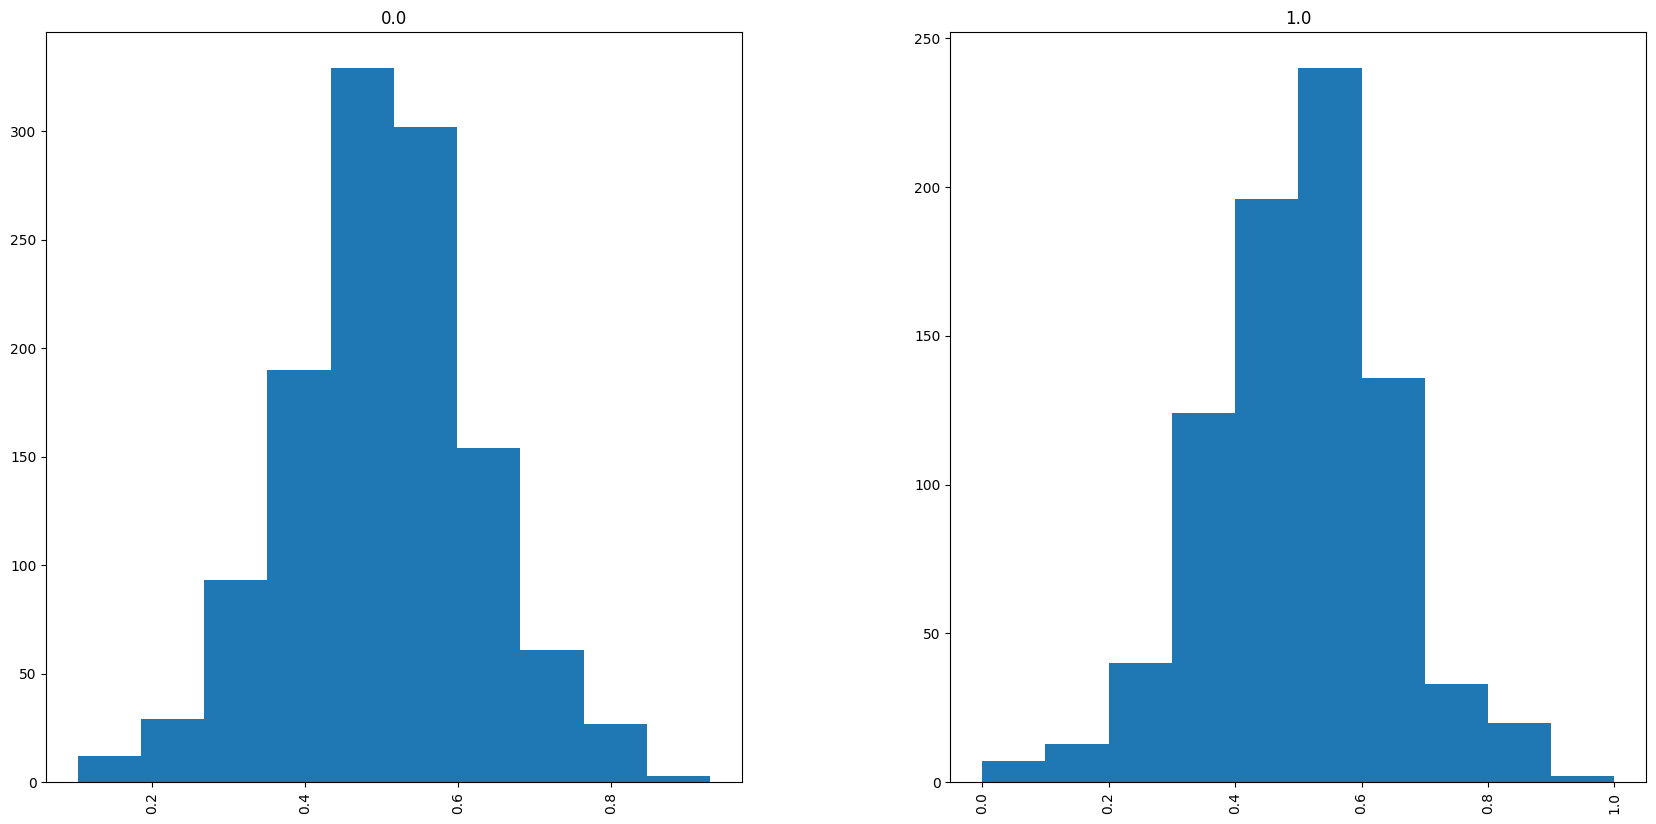

In [53]:
b.hist(column='Hardness', by='Potability')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


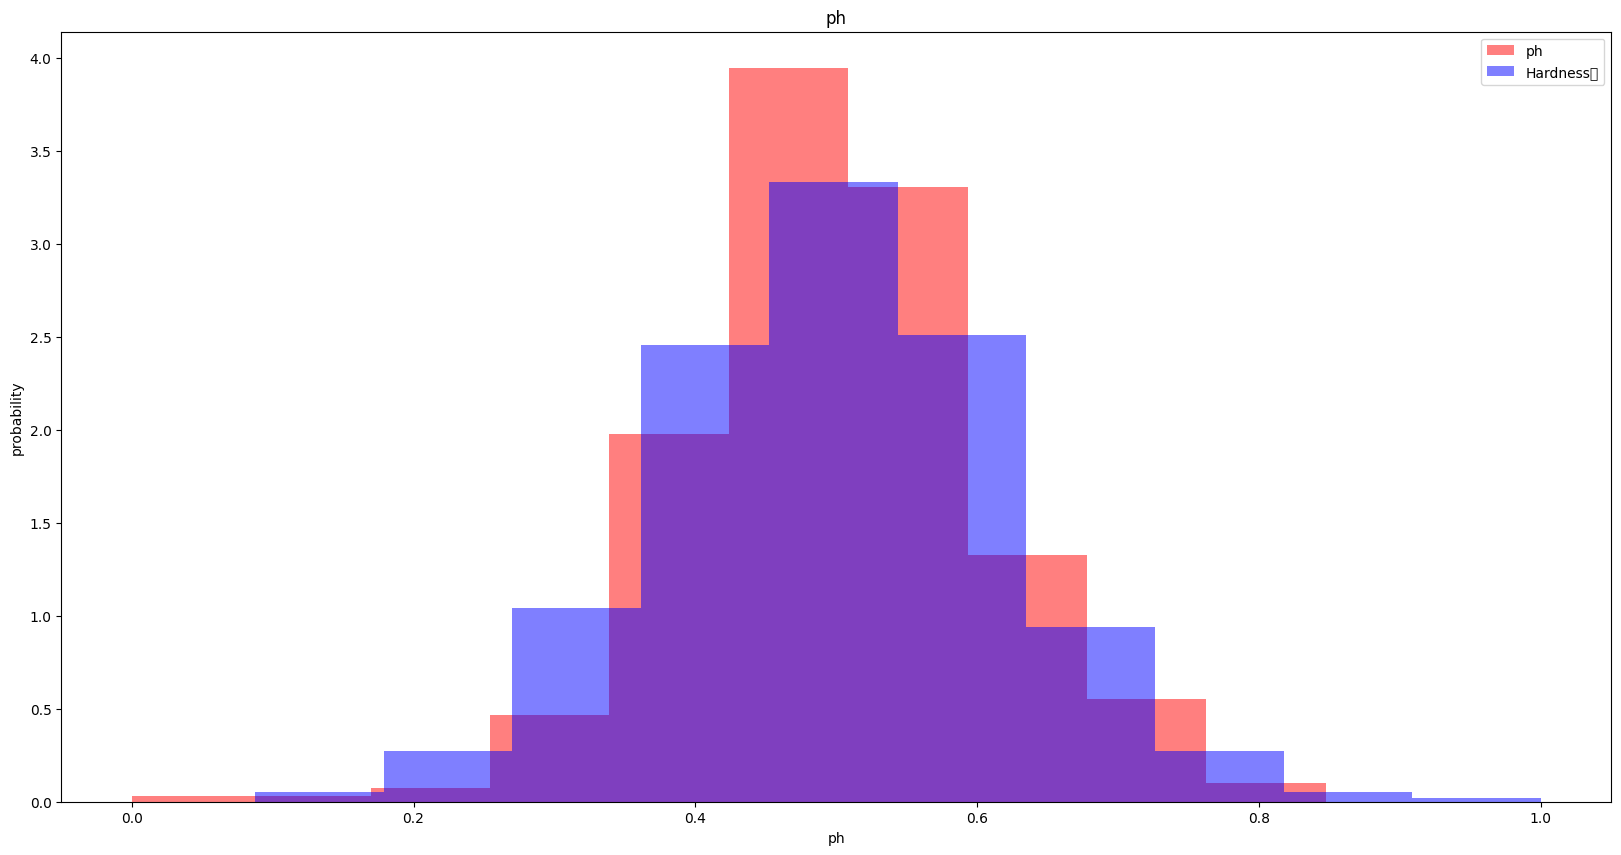

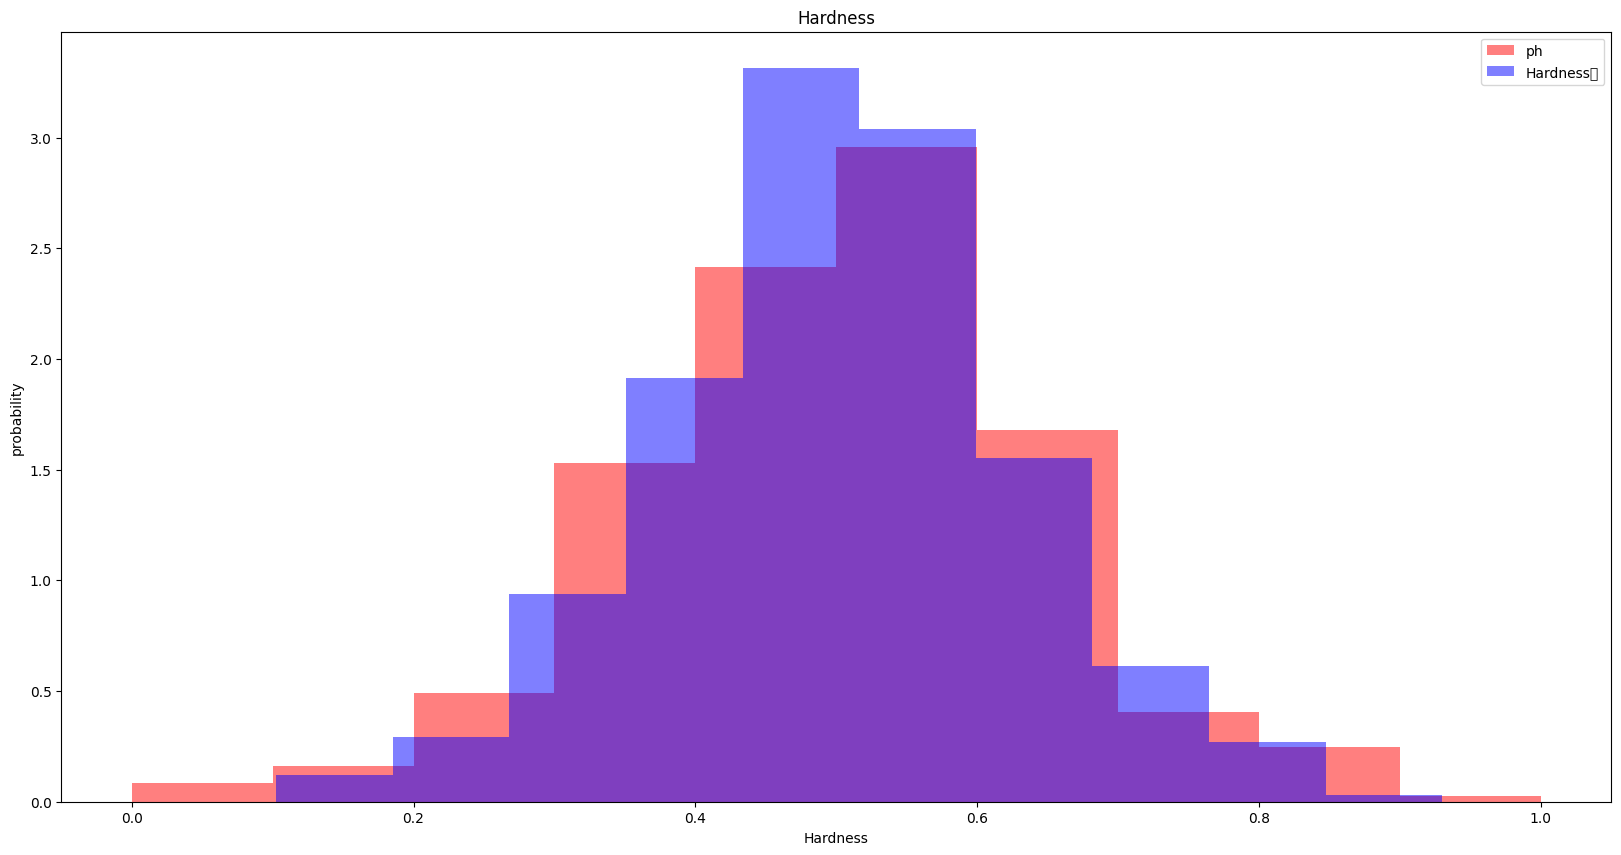

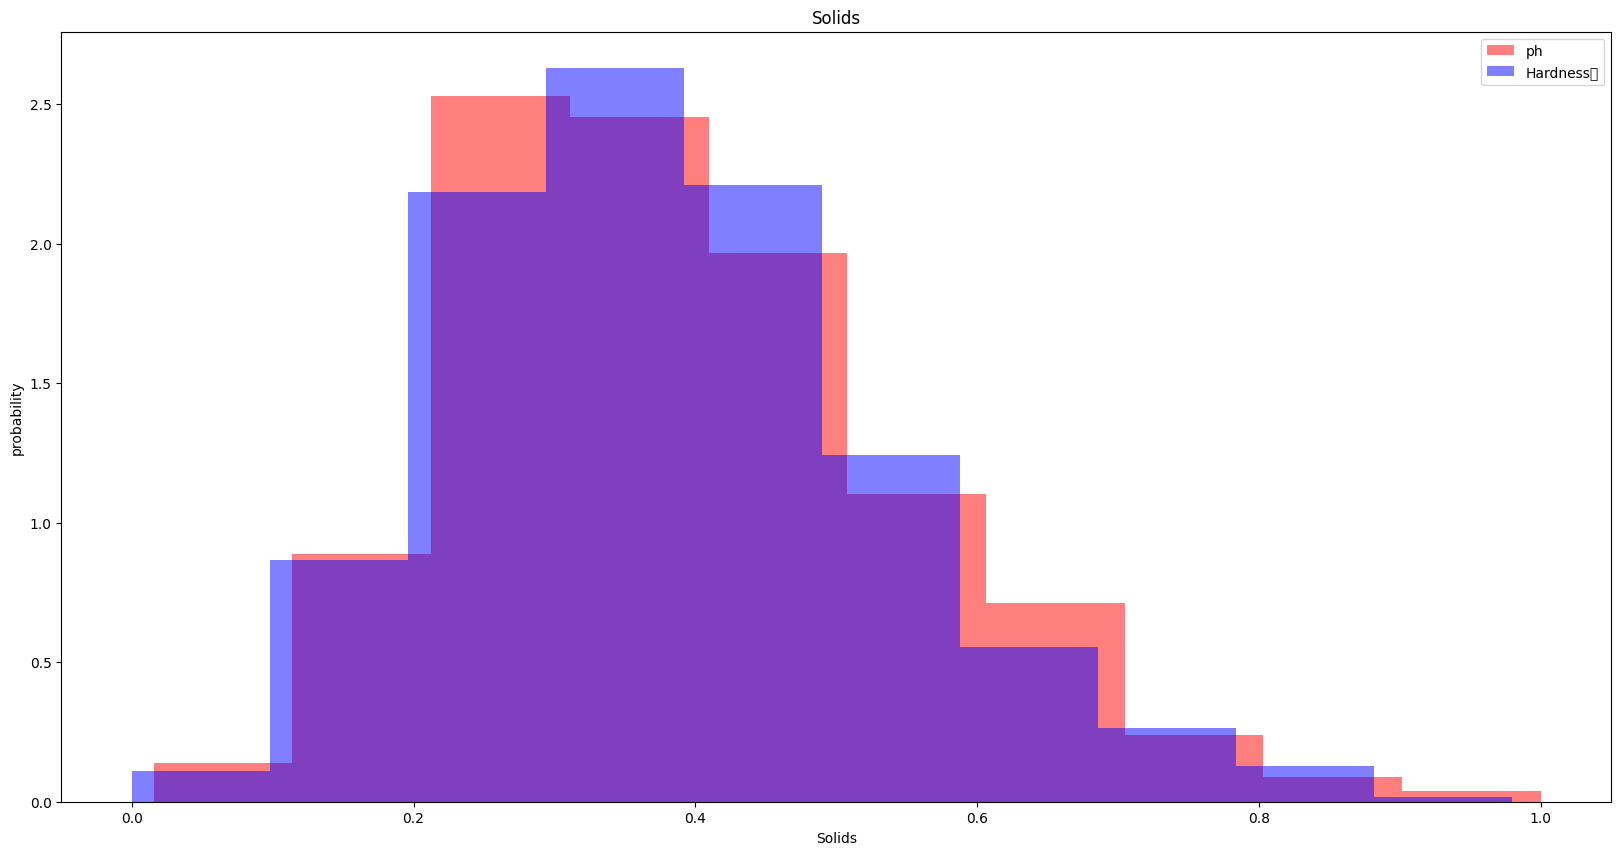

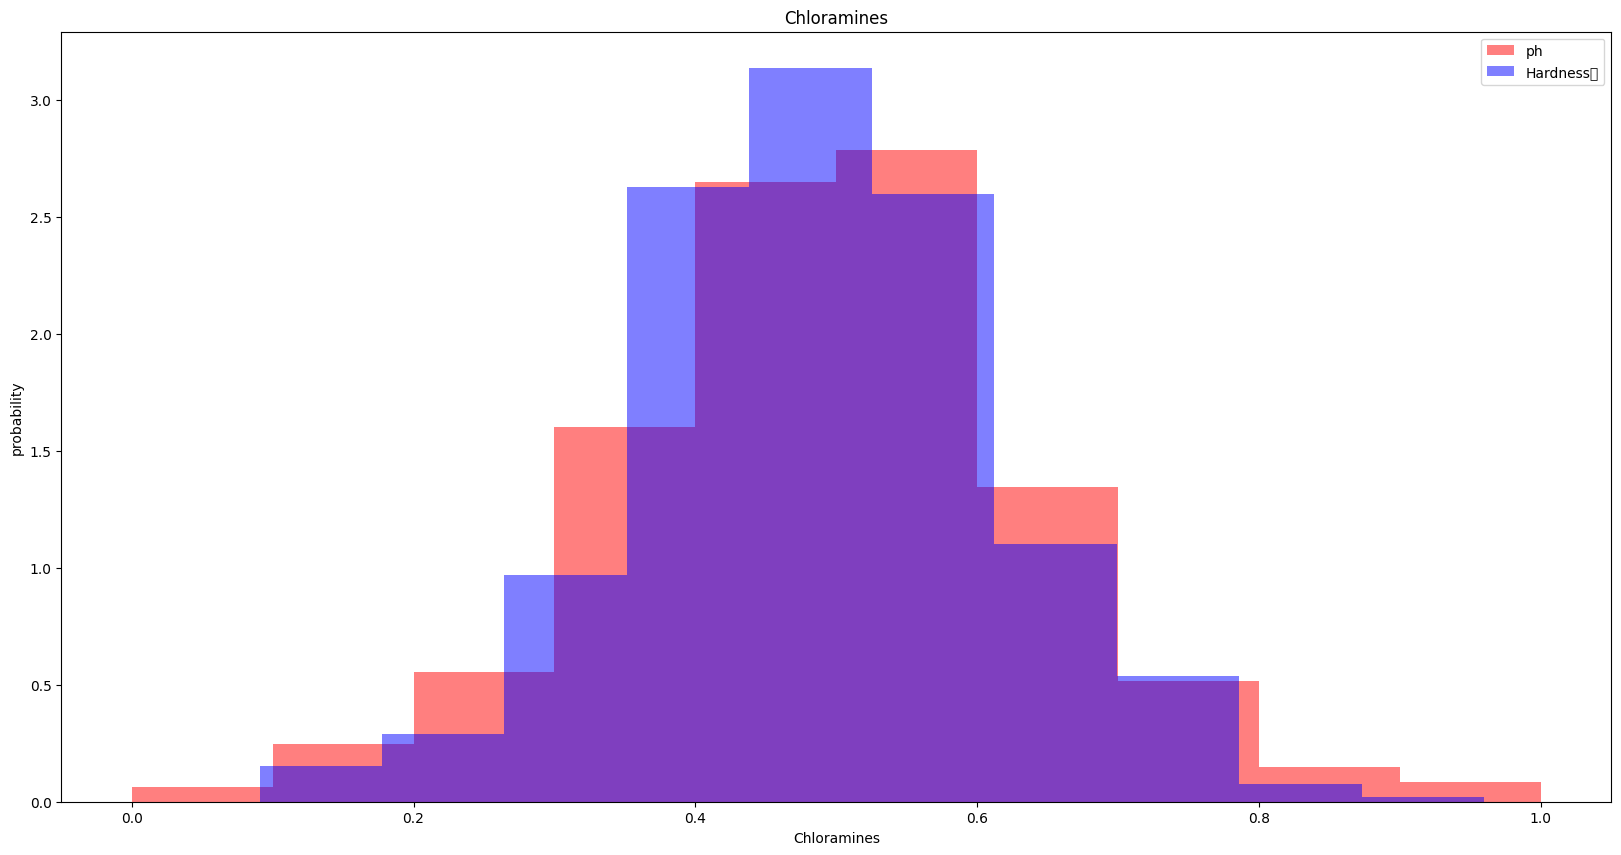

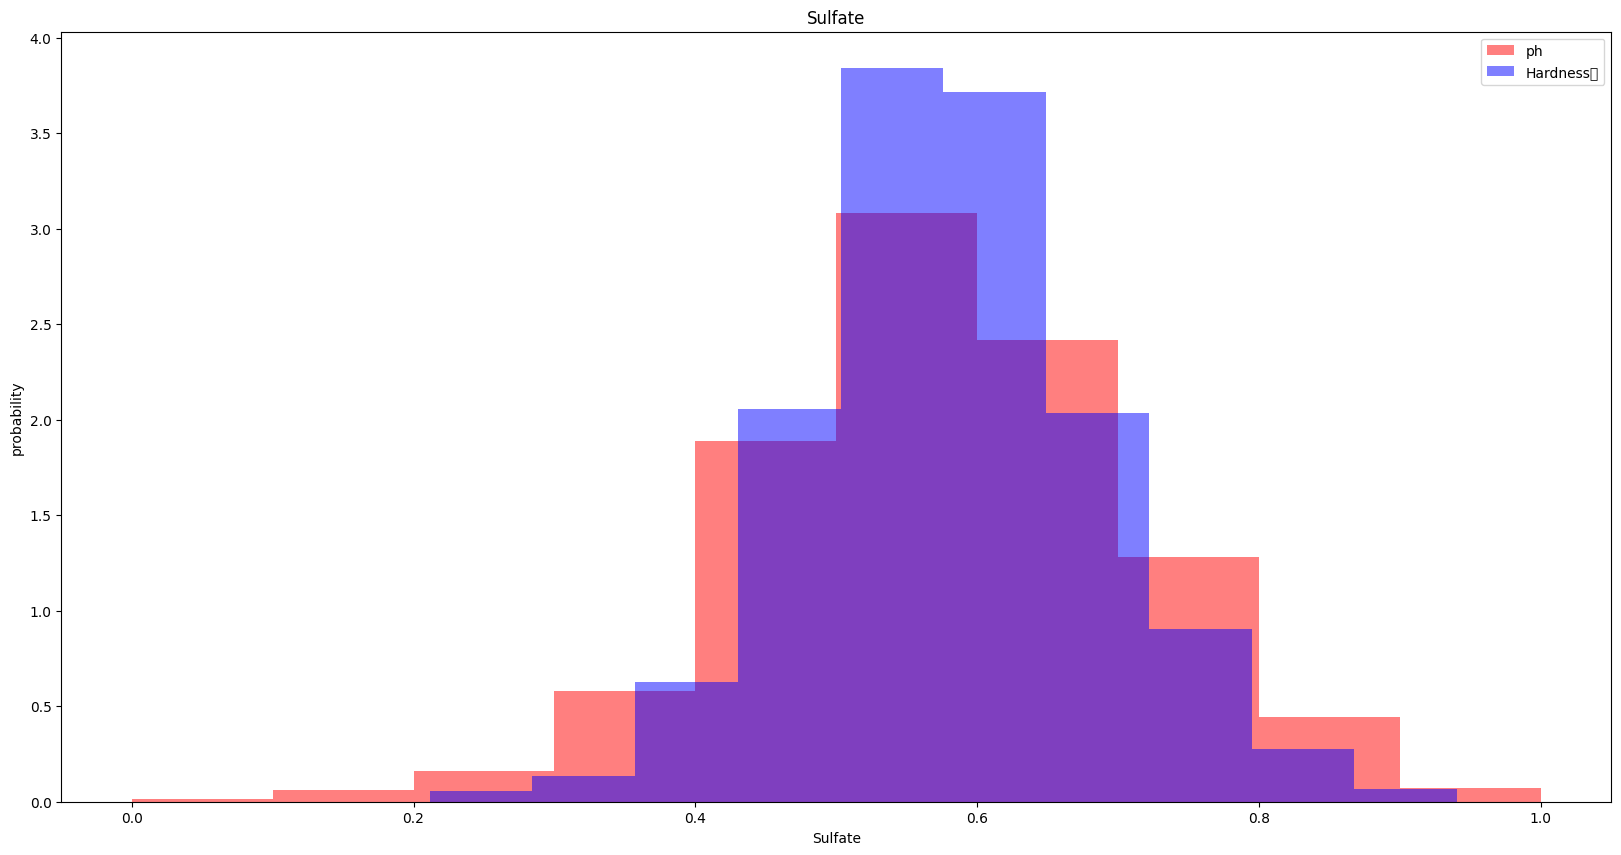

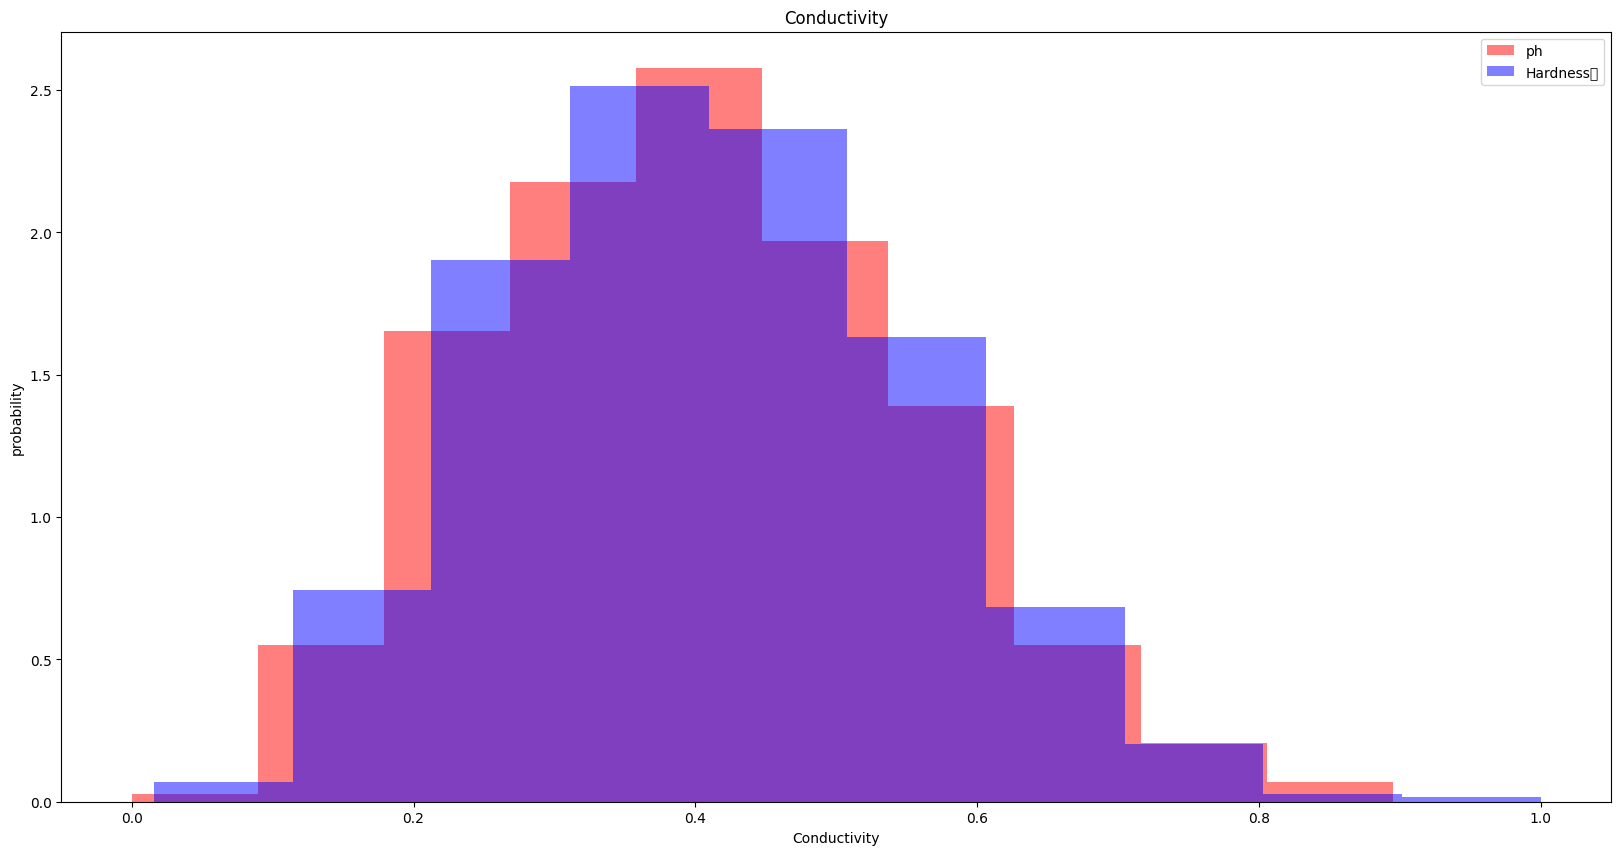

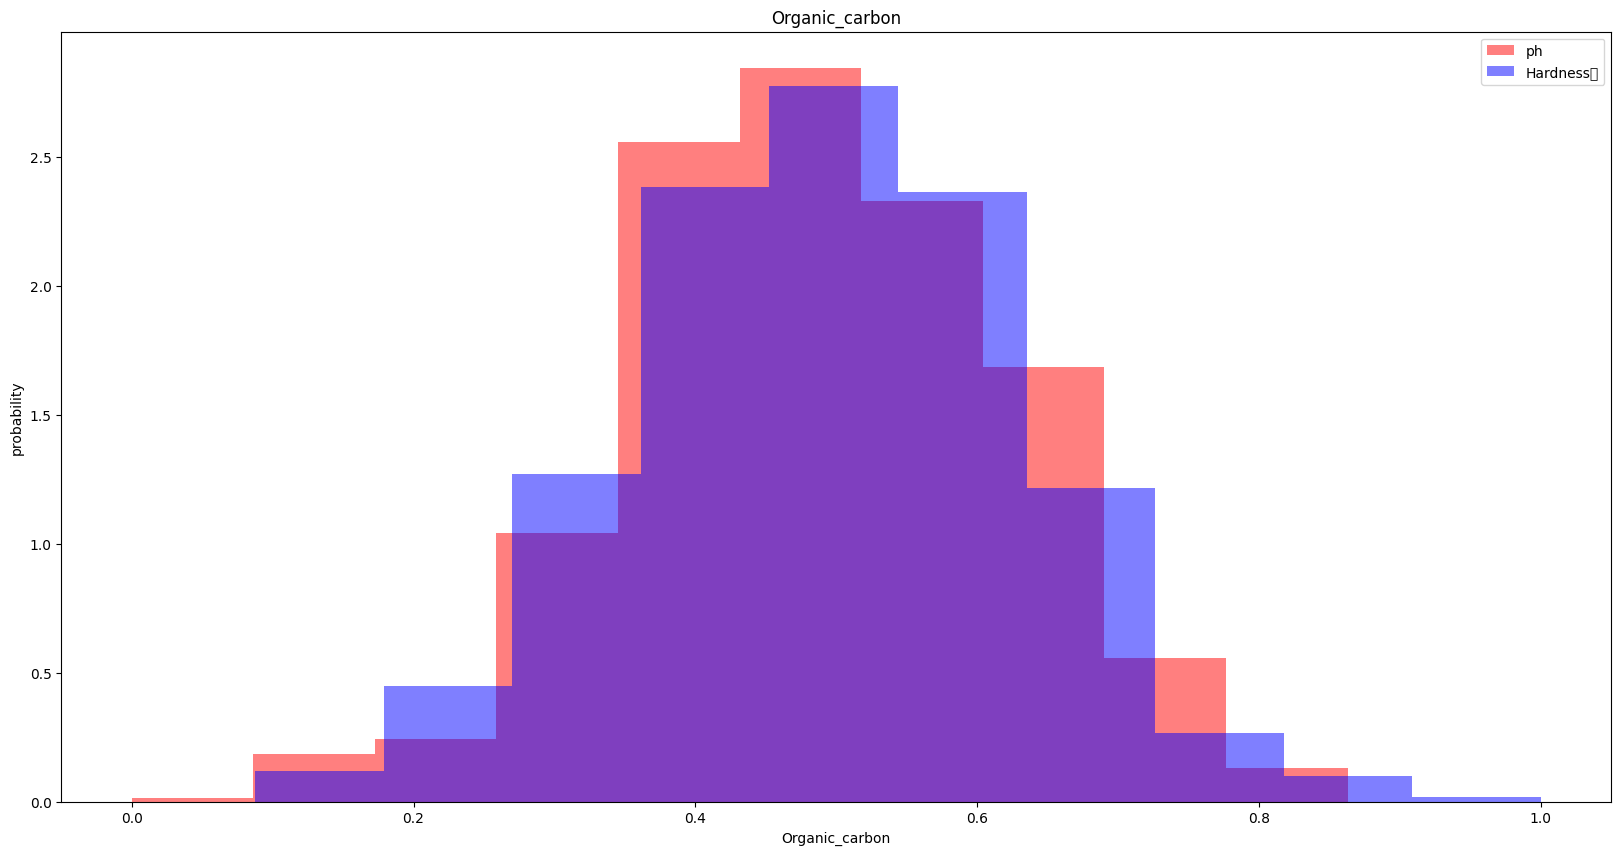

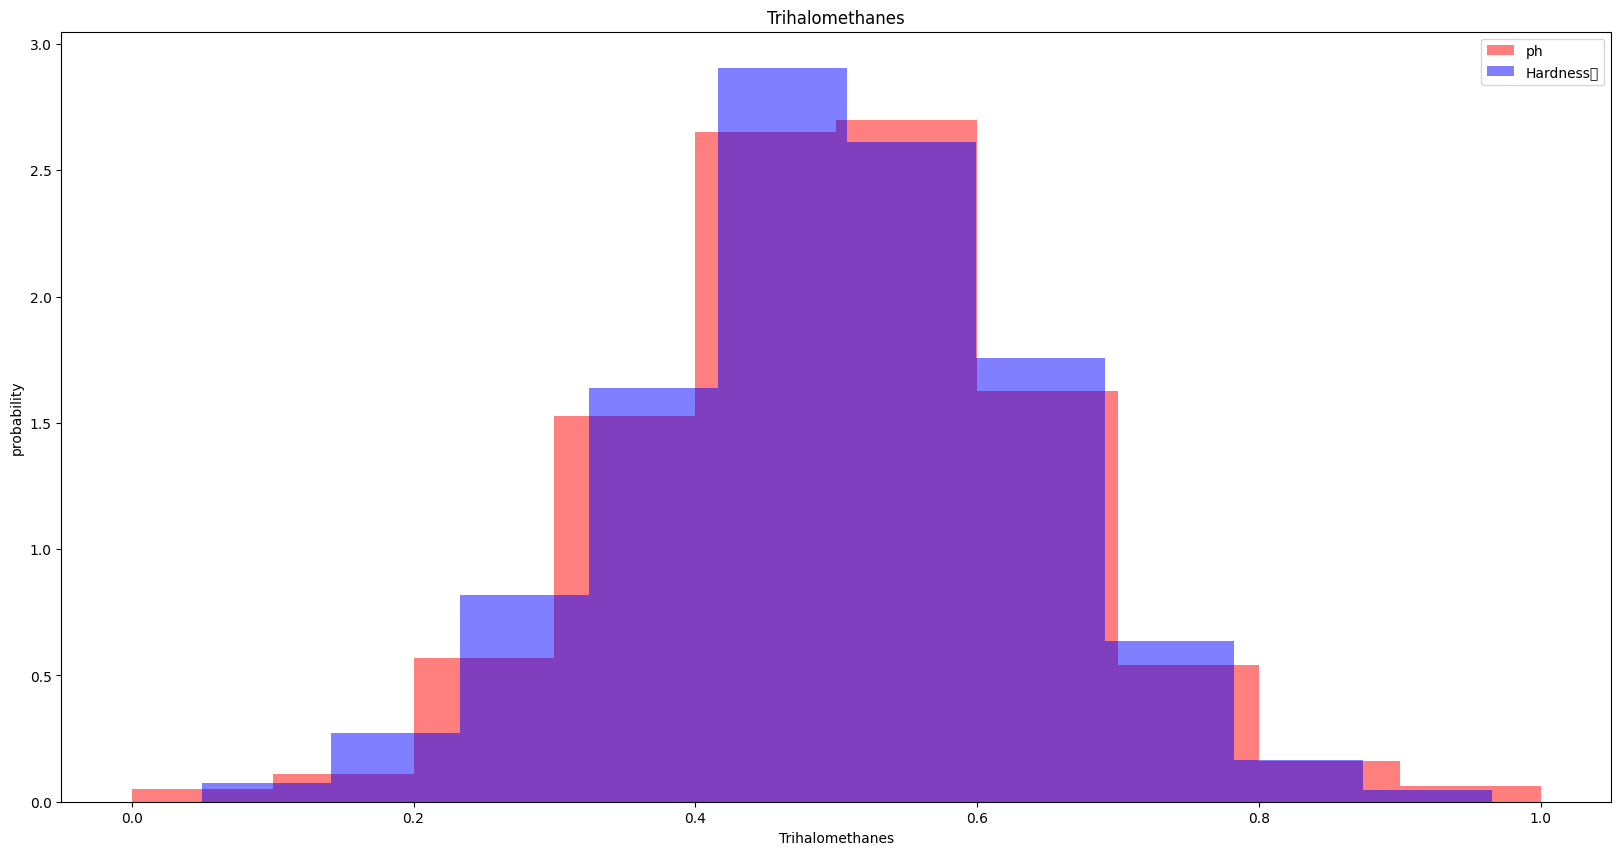

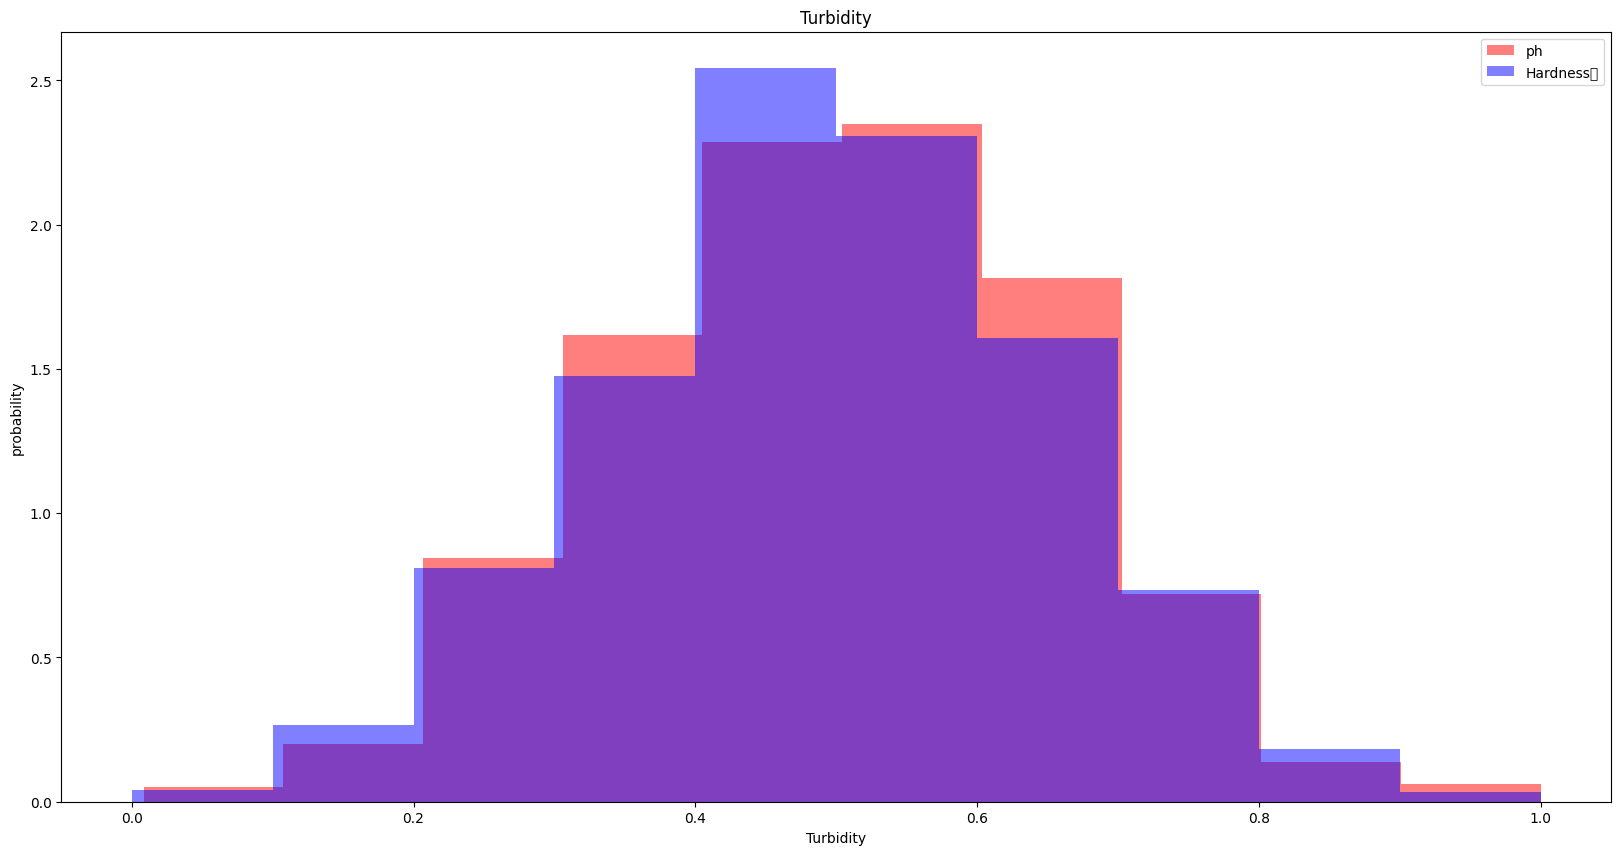

In [54]:
cols = b.columns
for label in cols[:-1]:
    plt.hist(b[b['Potability'] == 1][label],color = 'red',label = 'ph',alpha = 0.5,density = True)
    plt.hist(b[b['Potability'] == 0][label],color = 'blue',label = 'Hardness	',alpha = 0.5,density = True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [55]:
train, valid, test = np.split(b.sample(frac=1), [int(0.6*len(b)), int(0.8*len(b))])

In [56]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [57]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [58]:
print(train)

[[ 0.64383593  0.41369388  0.1744001  ...  0.07475139 -1.32800402
   0.        ]
 [-0.92876567  0.28915757 -0.65498487 ...  0.44757028 -0.6475896
   0.        ]
 [-0.74217026  1.39466723  0.36975906 ... -0.34240702  0.04825528
   1.        ]
 ...
 [-0.75355946 -1.68197648 -1.28629571 ...  1.44535972 -0.84421964
   1.        ]
 [ 1.03155629  0.25369204  0.24108404 ...  0.16148467 -1.05282628
   1.        ]
 [-1.43003344  0.68569098 -0.68016739 ...  0.70823042  0.51998071
   1.        ]]


In [59]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1424
1424
403
403


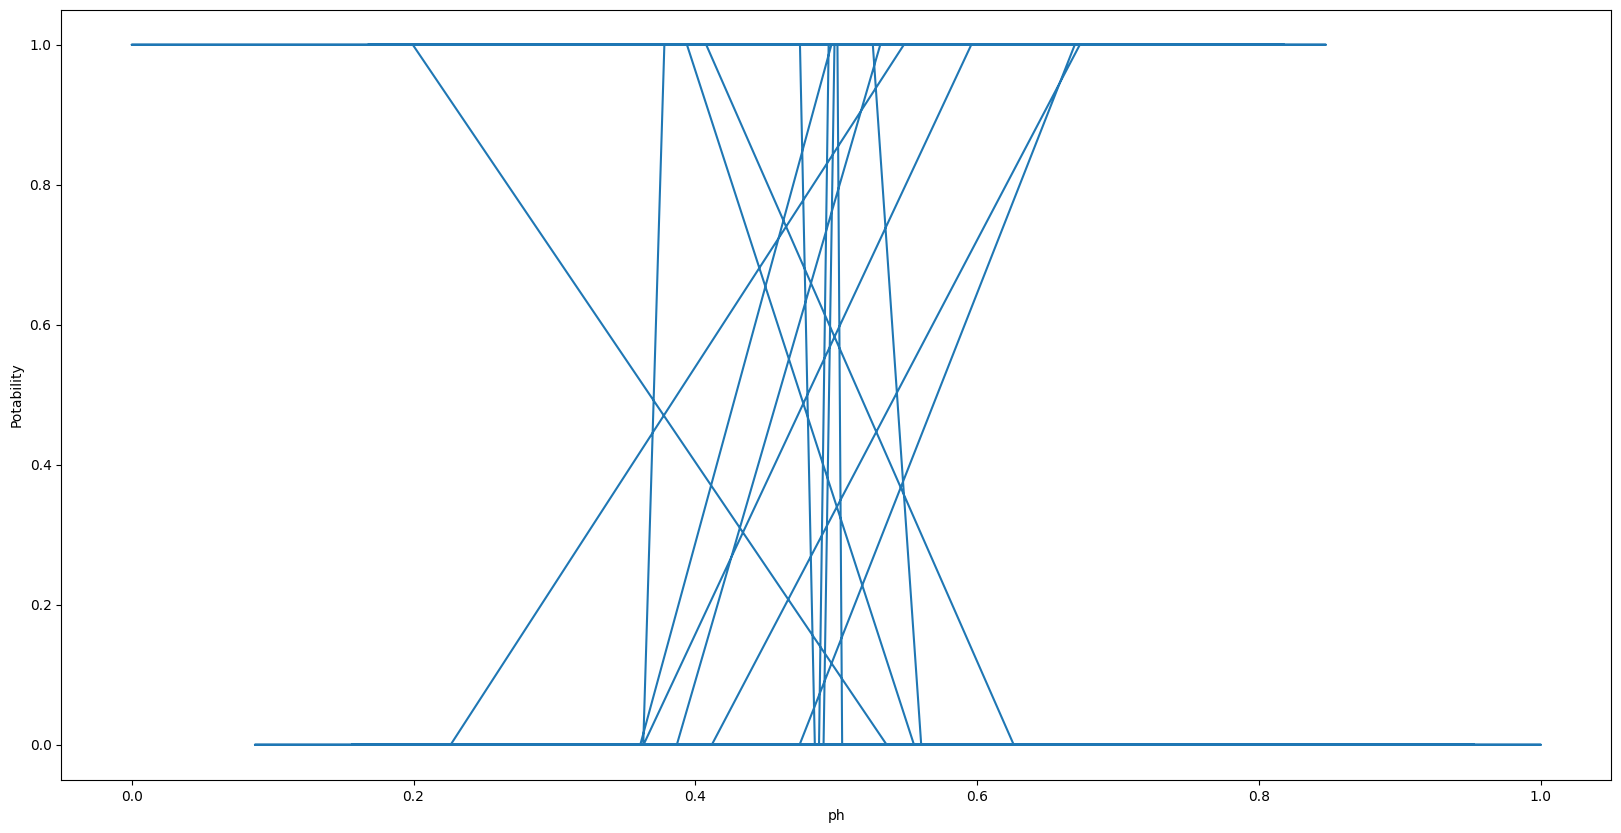

In [60]:
x2 = b['ph']
y = b['Potability']
import matplotlib .pyplot as plt
plt.xlabel('ph')
plt.ylabel('Potability')
plt.plot(x2,y)
plt.show()

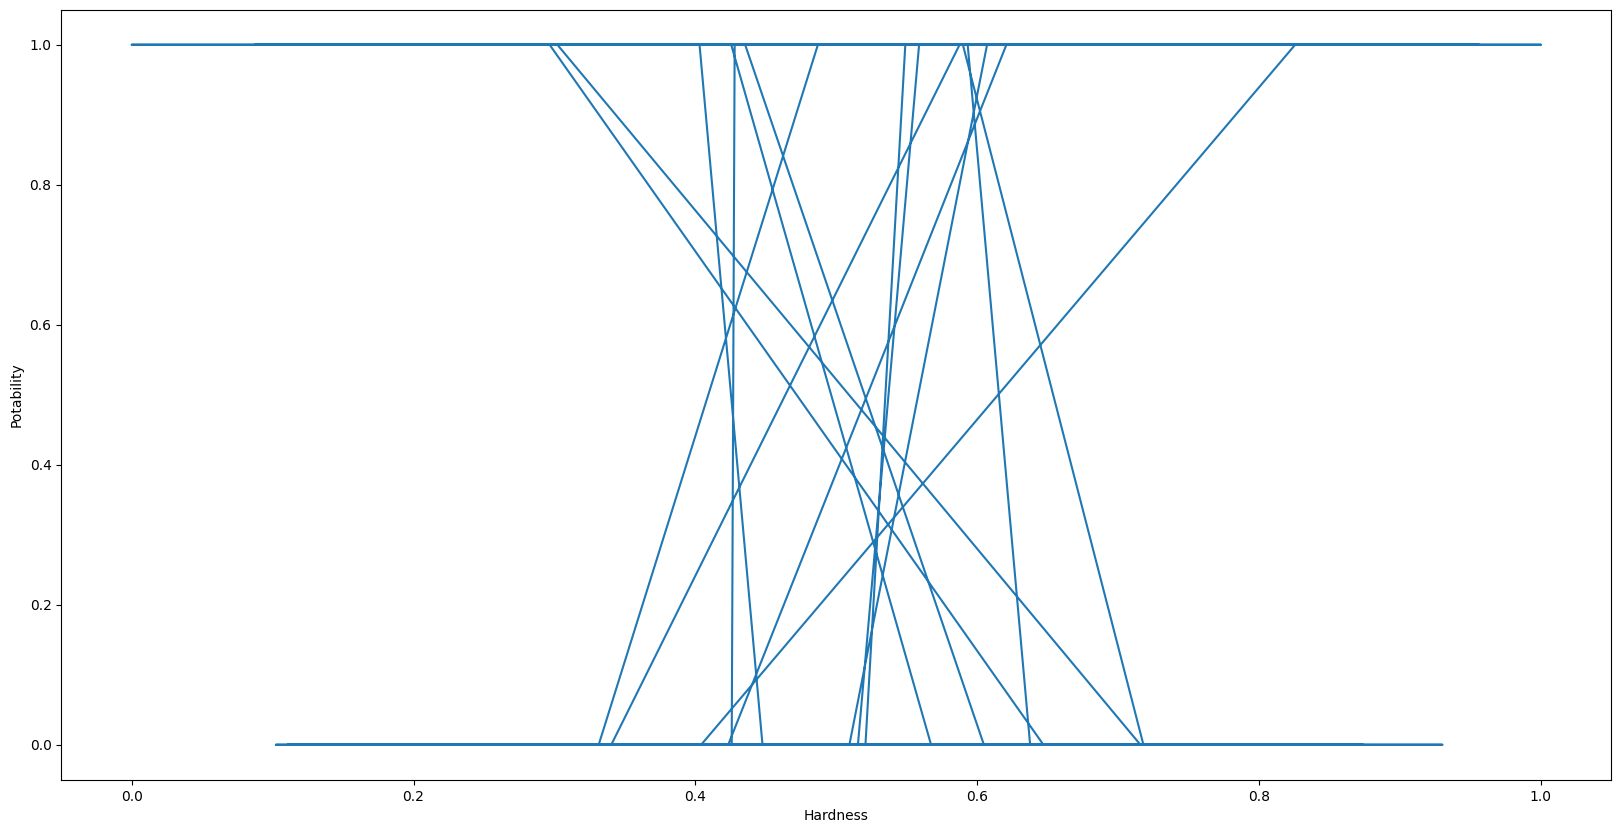

In [61]:
x2 = b['Hardness']
y = b['Potability']
import matplotlib .pyplot as plt
plt.xlabel('Hardness')
plt.ylabel('Potability')
plt.plot(x2,y)
plt.show()

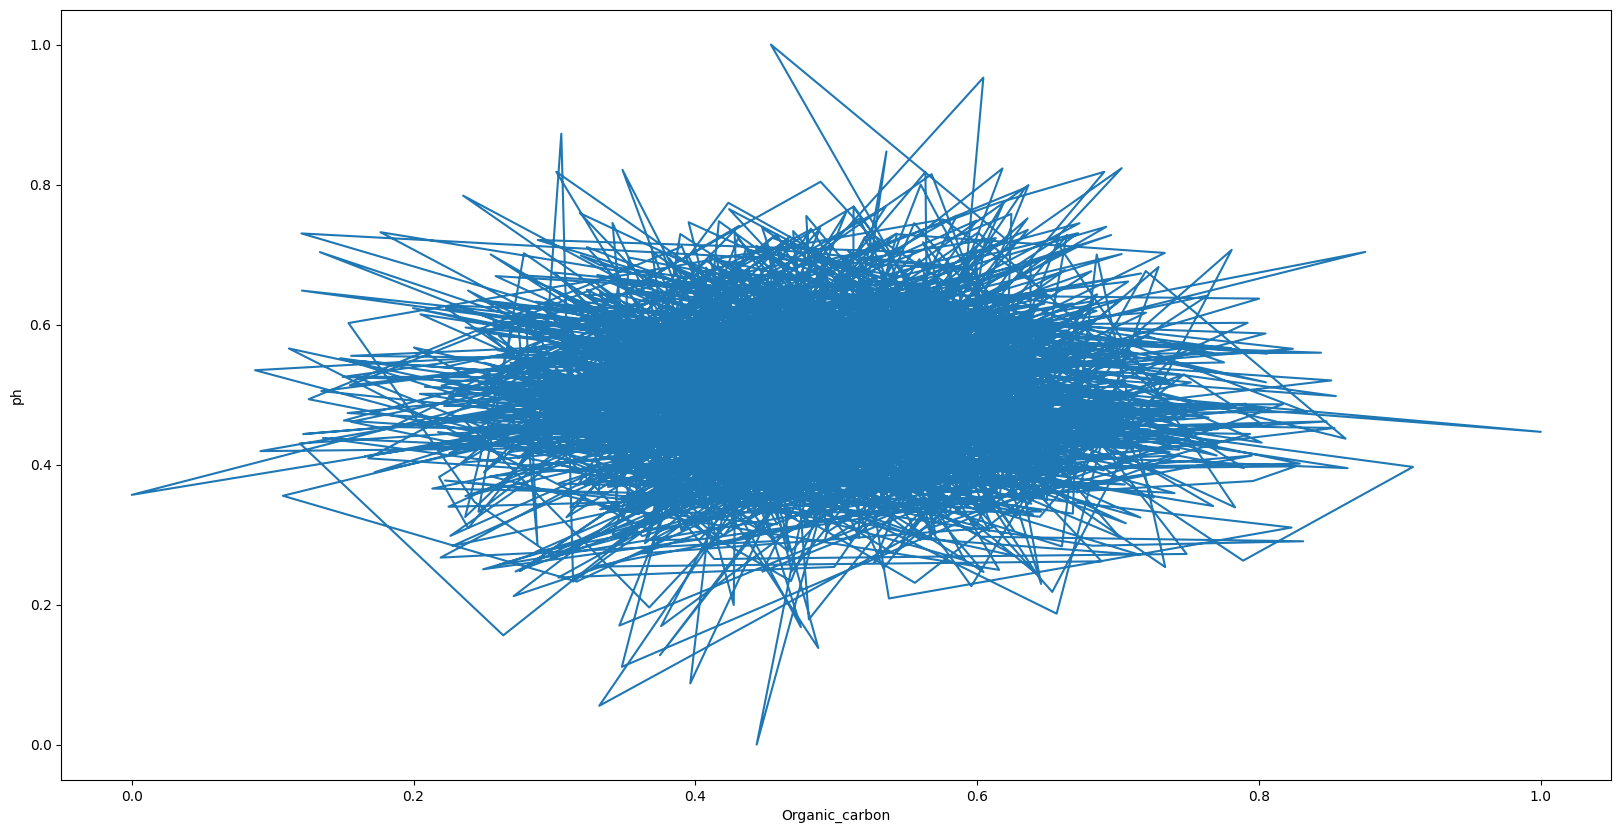

In [62]:
x2 = b['Organic_carbon']
y = b['ph']
import matplotlib .pyplot as plt
plt.xlabel('Organic_carbon')
plt.ylabel('ph')
plt.plot(x2,y)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
yp=[]
#implementing perceptron model

def perceptron(w,x1,d):
    q=0
    for i in range(len(x1)):
       for j in range(len(w)):
          s=(x1[i][j]*w[j])+d
          s2=1/(1+np.exp(-s))
          if(s2>=0.5):
             yp.append(1)
          else:
             yp.append(0)
    q=q+1
    return yp
accuracy_list = []
#print("enter weights w : ")
num_iter = 5
import random
for i in range(num_iter):
    w = []
    yp = []
    for j in range(5):
        val = random.uniform(0.0,1.0)
        w.append(val)
    #print(w)
    d = random.uniform(0.0,1.0)
    yp = perceptron(w,X_train,d)
    print(yp)
    predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
    total_predictions = len(y)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)
print(accuracy_list)

[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 

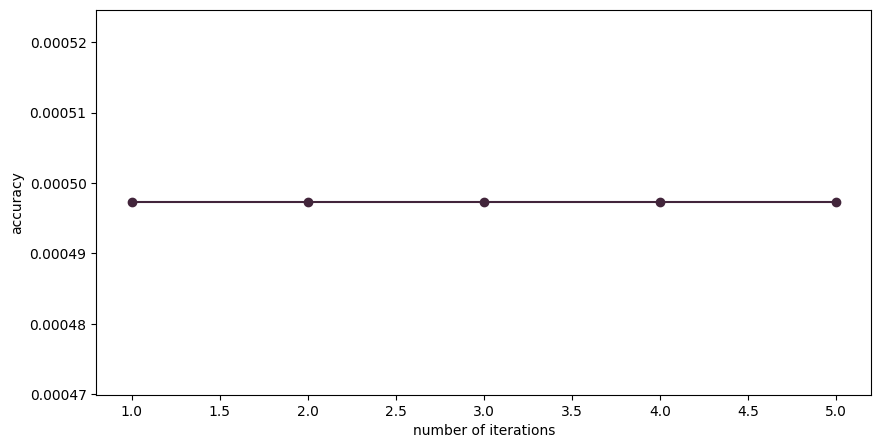

In [73]:
num_iterations= [1,2,3,4,5]
plt.figure( figsize = ( 10 , 5 ) )
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
# Accuracy scores plot obtained from above iterations
plt.plot(num_iterations, accuracy_list, label = 'Accuracy', marker = 'o', color = '#42253B')

In [74]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Create a Perceptron instance and fit the training data
clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_PM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_PM)

[0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.

In [75]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")
        print("",self.cost_history)
    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Importing logistic regression function from scikit learn directly

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_LR)
print(classification_report(y_test, y_pred))

[1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cost after iteration 0: 0.6931321601556136
Cost after iteration 100: 0.6919700560775714
Cost after iteration 200: 0.69128525058745
Cost after iteration 300: 0.6908800007488509
Cost after iteration 400: 0.6906391414171288
Cost after iteration 500: 0.6904953825201232
Cost after iteration 600: 0.6904092359942399
Cost after iteration 700: 0.6903574203734695
Cost after iteration 800: 0.6903261456263448
Cost after iteration 900: 0.6903072075396296
 [0.6931321601556136, 0.6931172195120937, 0.6931023582011167, 0.6930875757967168, 0.6930728718752199, 0.6930582460152312, 0.693043697797623, 0.6930292268055227, 0.6930148326243014, 0.6930005148415619, 0.6929862730471265, 0.6929721068330256, 0.692958015793486, 0.6929439995249199, 0.6929300576259119, 0.692916189697209, 0.6929023953417084, 0.6928886741644461, 0.6928750257725859, 0.6928614497754081, 0.6928479457842978, 0.6928345134127347, 0.6928211522762809, 0.6928078619925705, 0.692794642181299, 0.6927814924642111, 0.6927684124650909, 0.69275540180975

In [92]:
#SVM INBUIKT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

[1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.

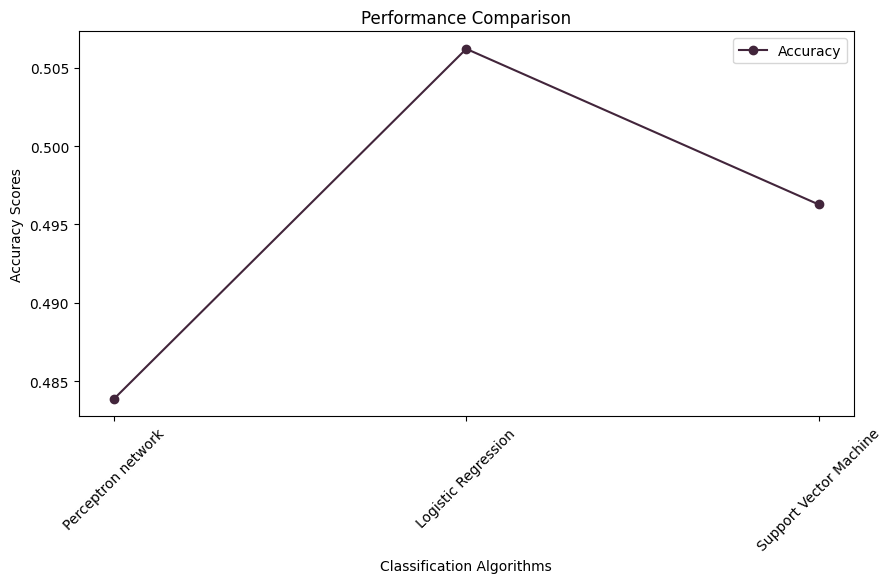

In [79]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine']
accuracy_scores = [ accuracy_PM , accuracy_LR , accuracy_SVM ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot
plt.show ()

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))

[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.

In [84]:
from sklearn.utils import resample
# Define the machine learning model
model = LogisticRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_lgr.append(score)

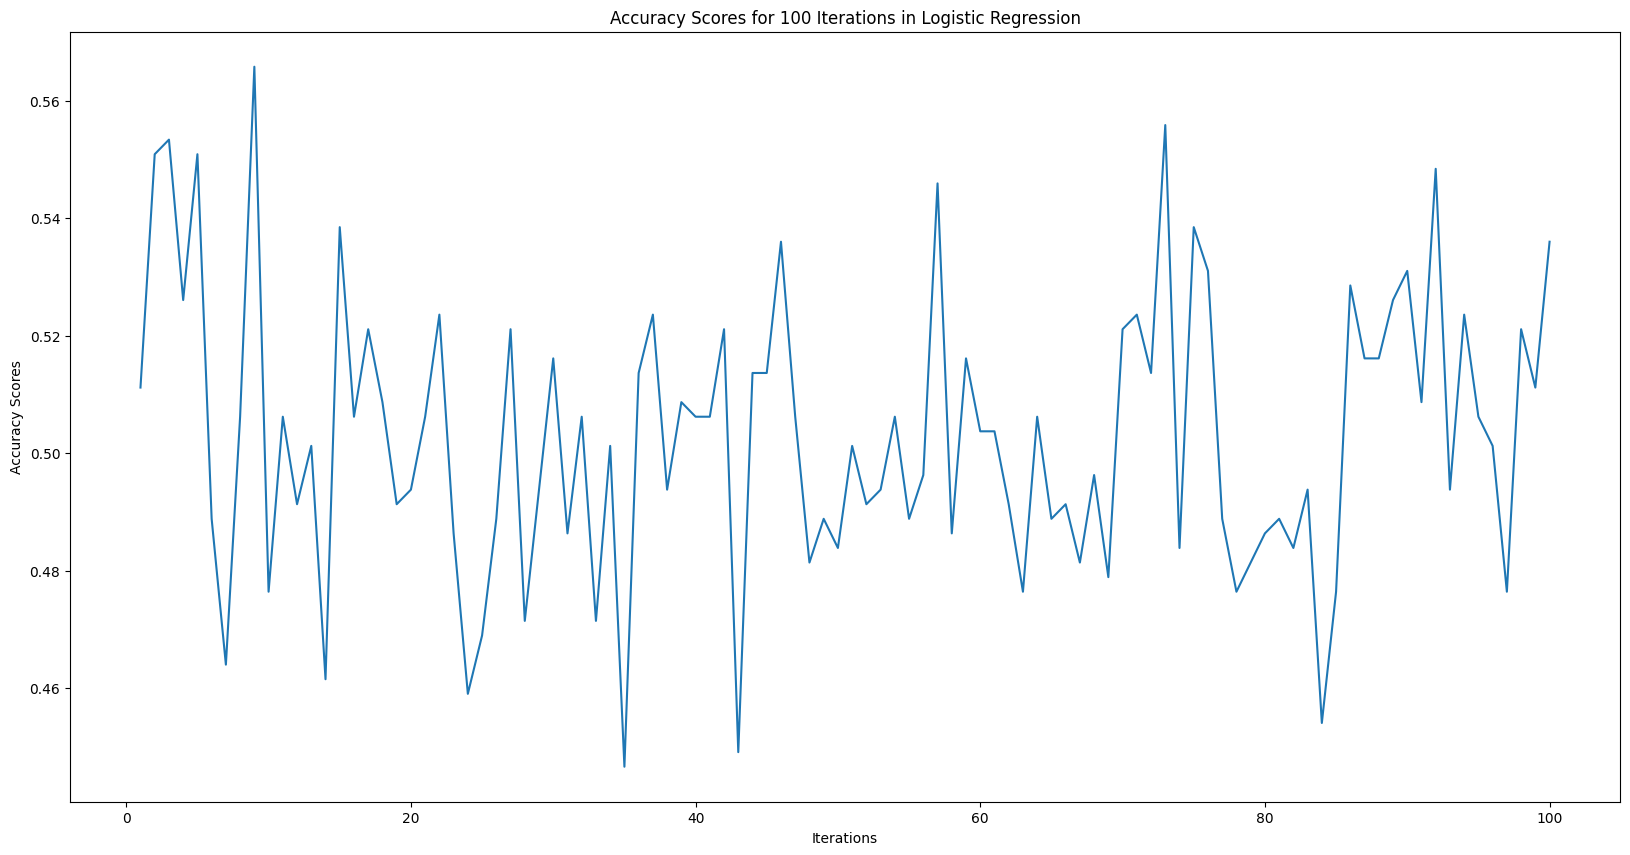

In [107]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Logistic Regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [88]:
from sklearn.utils import resample
# Define the machine learning model
model = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_per = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_per.append(score)

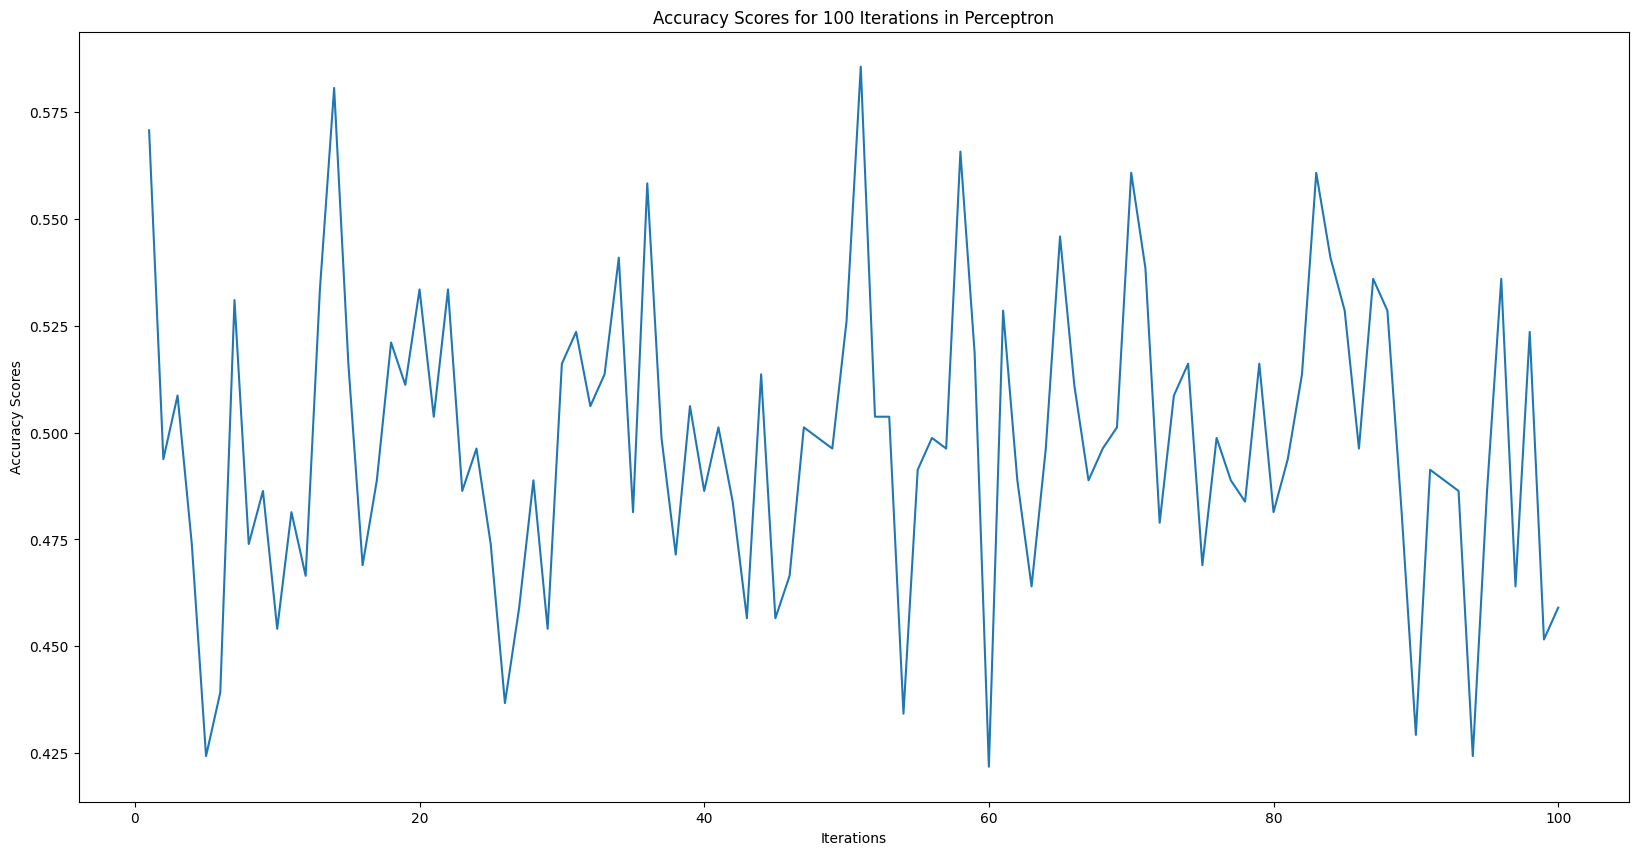

In [89]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_per)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Perceptron")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [99]:

from sklearn.utils import resample
# Define the machine learning model
model = SVC(kernel='linear', C=1, random_state=42)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_svc = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_svc.append(score)

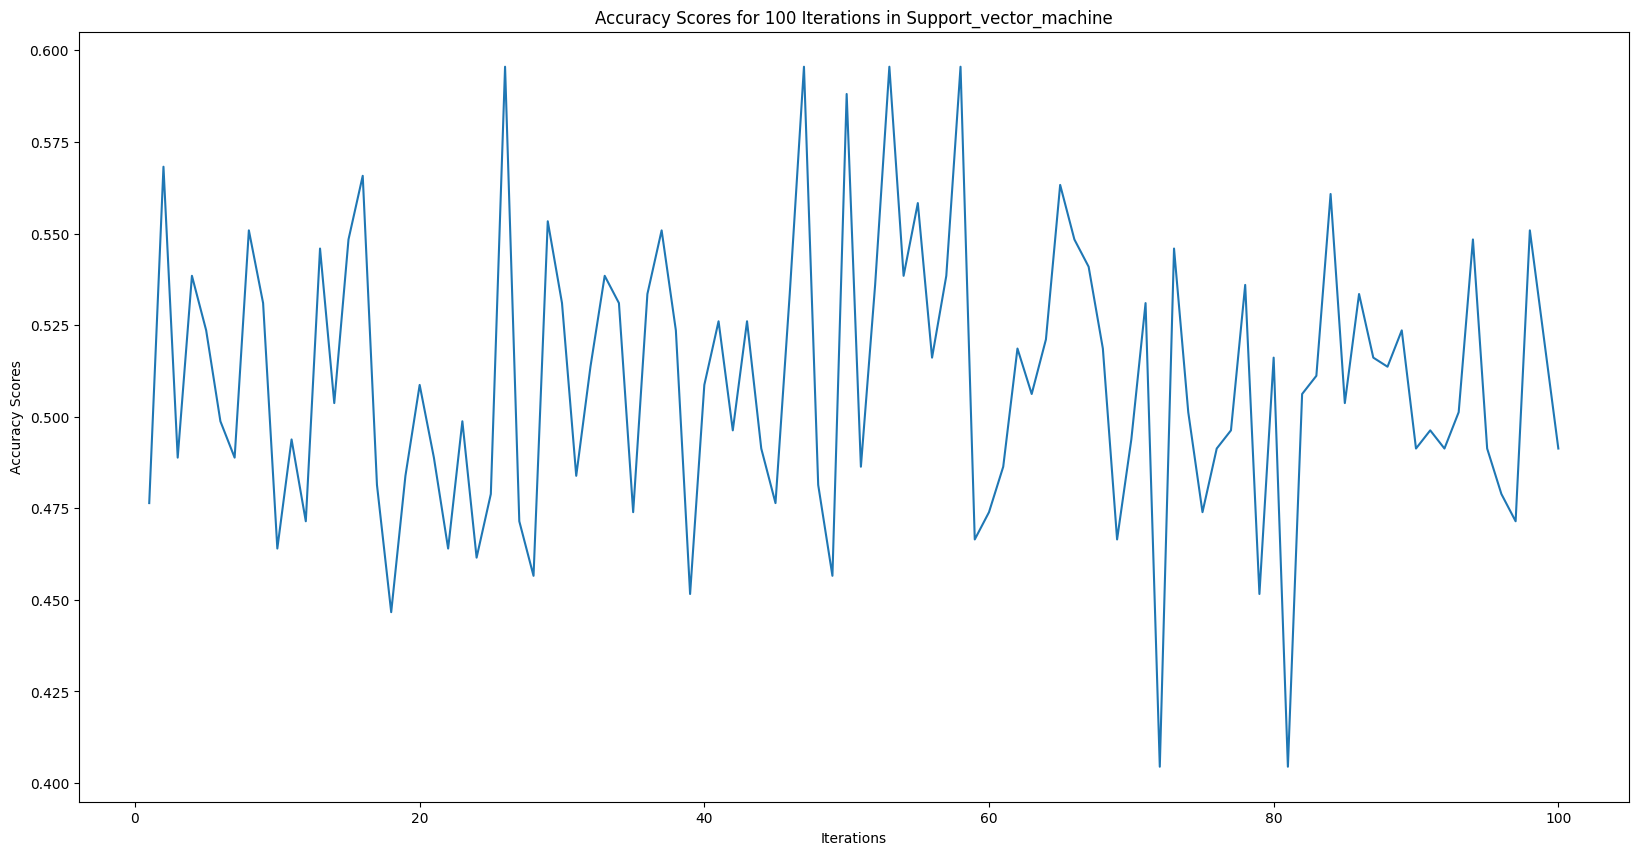

In [106]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_svc)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Support_vector_machine")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [102]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsClassifier(n_neighbors=3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_knn = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_knn.append(score)

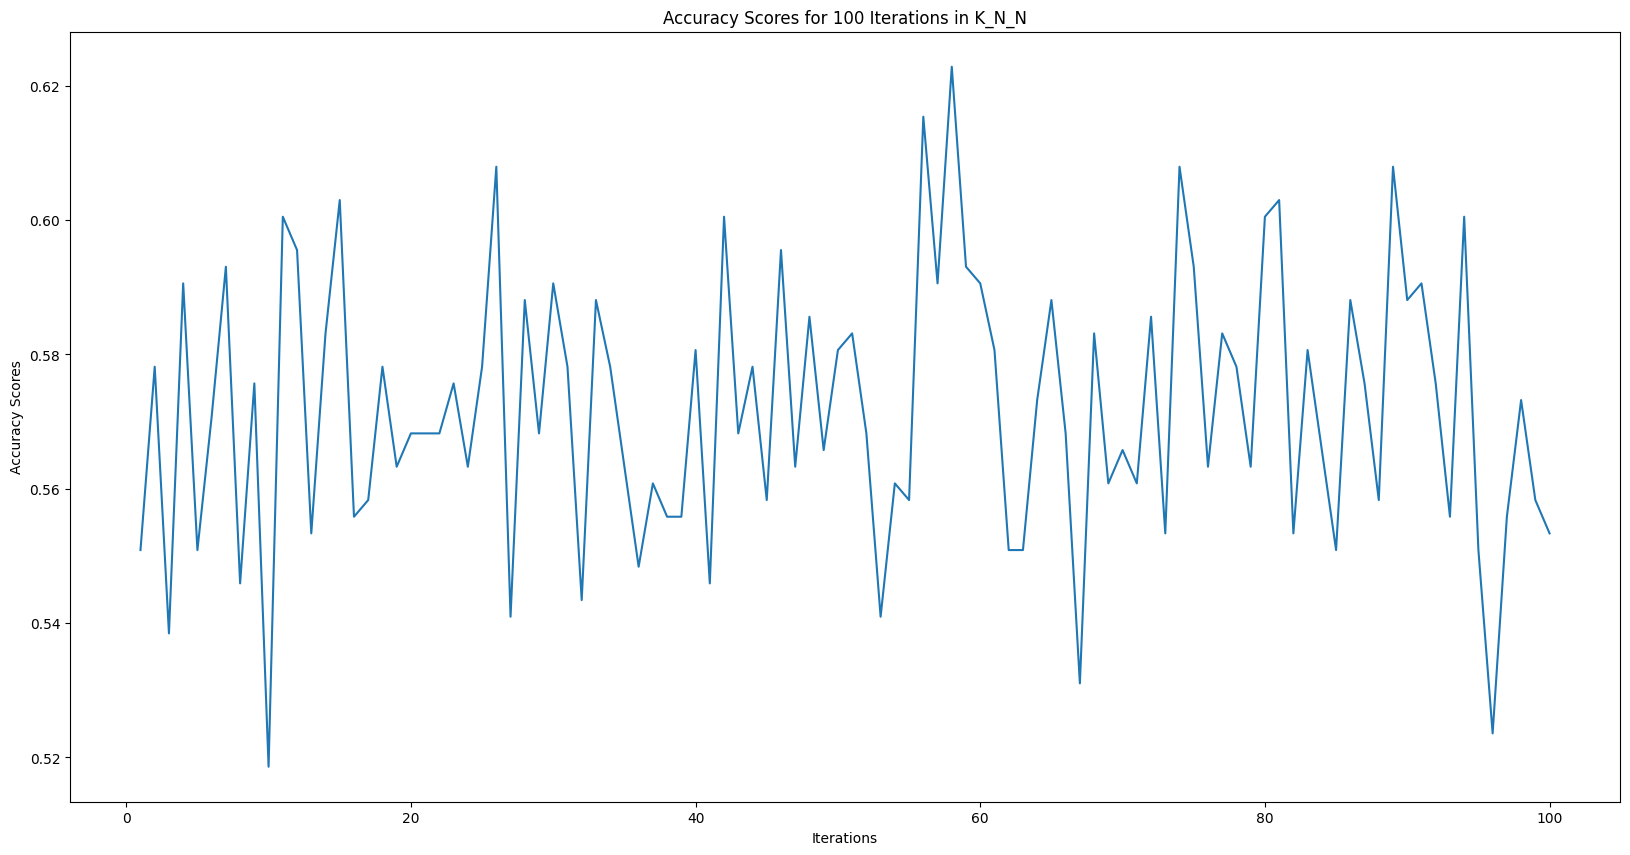

In [105]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_knn)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in K_N_N")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()